In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [19]:
# load data from prior iterations
comps_all, spectra_all = [], []
for i in range(8):
    comps = np.load("../data/comps_%d.npy"%i)
    spectra = np.load("../data/spectra_%d.npy"%i)
    comps_all.append(comps)
    spectra_all.append(spectra)

comps_all = np.concatenate(comps_all)
spectra_all = np.concatenate(spectra_all)

In [20]:
# load data from latest synthesis
spectra_072424 = pd.read_excel("./UVVis/2D_repeat_NO_redisperse_0724.xlsx", engine='openpyxl')
water = spectra_072424["G9"].to_numpy()
volumes = pd.read_csv("./volumes_repeat_071724.csv")
times = pd.read_csv("./times_repeat_071724.csv")
wavelength = spectra_072424["Wavelength"].to_numpy()

comps_072424 = np.stack((volumes.values[:,-1], times.values[:,-1])).T
spectra_072424_nobkg = (spectra_072424.iloc[:,1:-1].values-water[:,None]).T

In [21]:
spectra_train = []
for i in range(80):
    spectra_new = spectra_072424_nobkg[i,:]
    spectra_old = spectra_all[i,:]
    if (spectra_new<0.01).all():
        spectra_train.append(spectra_old)
    else:
        spectra_train.append(spectra_new)

spectra_train = np.asarray(spectra_train)

In [22]:
comps_072424.shape

(80, 2)

In [23]:
N_INIT_POINTS = 24
N_BATCH = 8 
for i in range(8):
    if i==0:
        min_ind = 0
        max_ind = 24
    else:
        min_ind = 24+(8*(i-1))
        max_ind = 24+8*i
    ci = comps_072424[min_ind:max_ind,:]
    si = spectra_train[min_ind:max_ind, :]
    np.save("./data/comps_%d.npy"%i, ci)
    np.save("./data/spectra_%d.npy"%i, si)

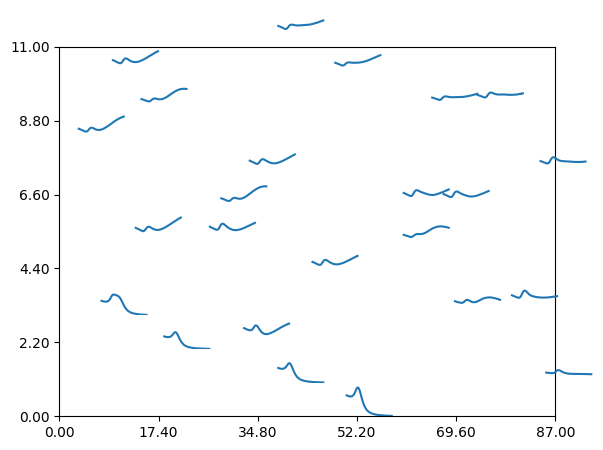

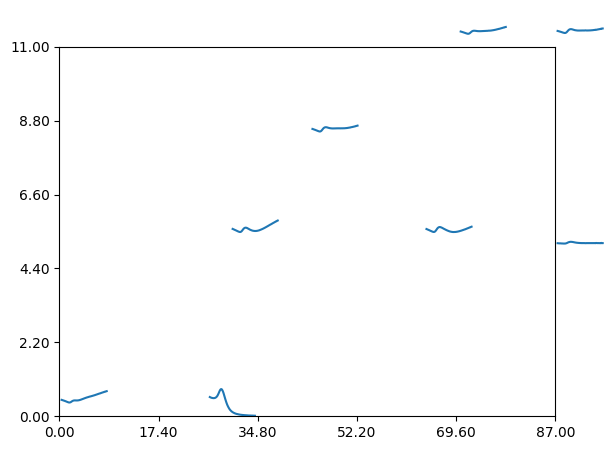

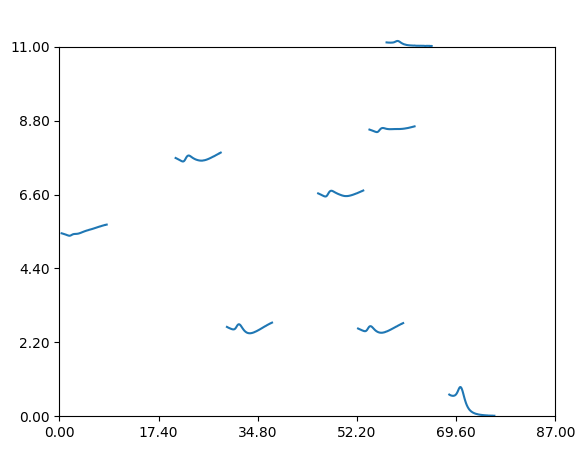

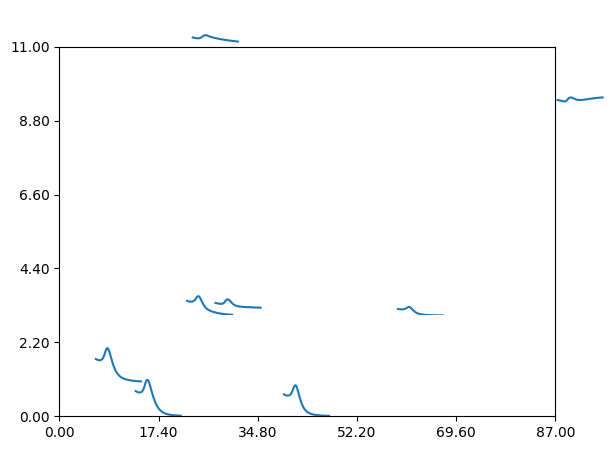

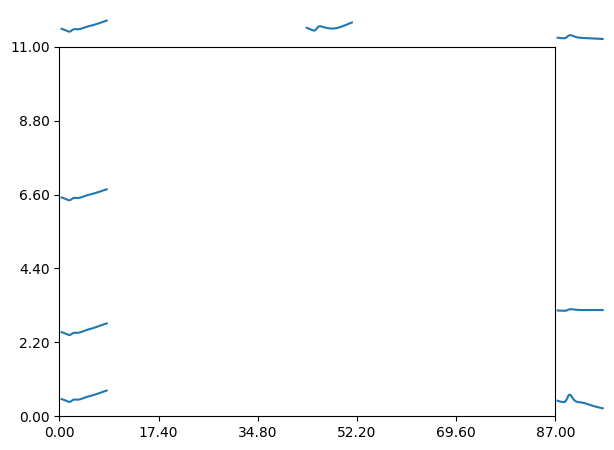

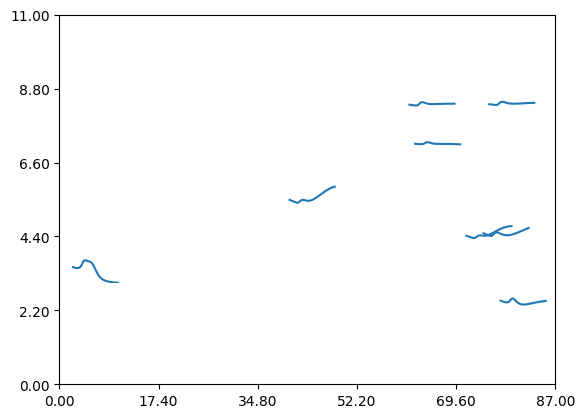

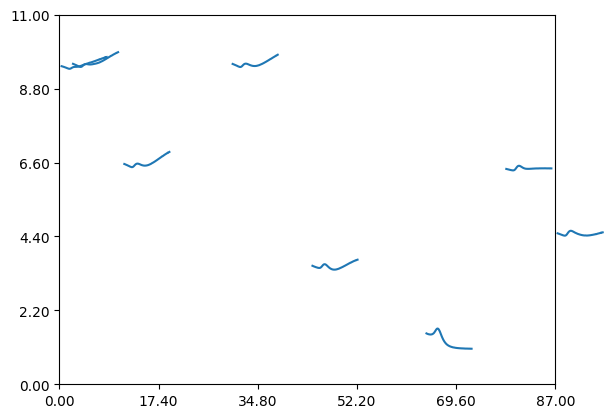

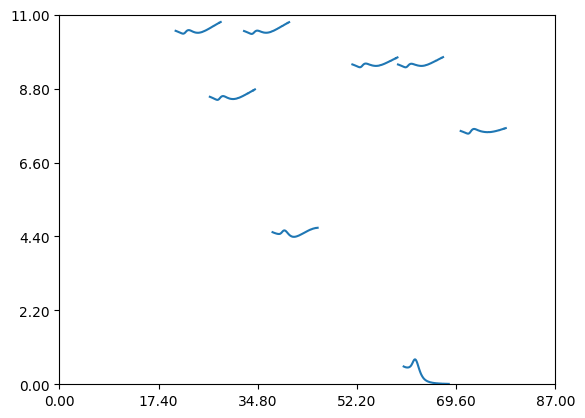

In [24]:
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T 

for i in range(8):
    fig, ax = plt.subplots()
    ci = np.load("./data/comps_%d.npy"%i)
    si = np.load("./data/spectra_%d.npy"%i)
    plot_phasemap(bounds, ax, ci, si, limits=[0,1.5])
    plt.show()
